## IMPORTING THE LIBRARIES 

In [57]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### To build the Neural Network, we first need to do some impage preprocessing

## Data Preprocessing 

### Training Image pre-processing 

In [58]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred", #means go inside my train folder and whatever is my directory, select it as my label 
    label_mode="categorical", #Since the label is not in the int but text
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True, #at the time of training shuffle the entire thing - this will reduce the biasness of 
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


### Validation Pre-processing

In [59]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred", #means go inside my train folder and whatever is my directory, select it as my label 
    label_mode="categorical", #Since the label is not in the int but text
    class_names=None,
    color_mode="rgb",
    batch_size=32, #*
    image_size=(128, 128), #*
    #each time a batch of 32 images with 128*128 size dimension is passed 
    shuffle=True, #at the time of training shuffle the entire thing - this will reduce the biasness of 
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [60]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [61]:
for x,y in training_set:
    print(x,x.shape)
    print(y, y.shape)
    break

tf.Tensor(
[[[[190.25 179.25 187.25]
   [179.25 168.25 176.25]
   [172.25 161.25 169.25]
   ...
   [209.5  199.5  207.5 ]
   [203.5  193.5  201.5 ]
   [199.25 189.25 197.25]]

  [[185.5  174.5  182.5 ]
   [167.75 156.75 164.75]
   [190.   179.   187.  ]
   ...
   [213.   203.   211.  ]
   [203.75 193.75 201.75]
   [177.5  167.5  175.5 ]]

  [[198.5  187.5  195.5 ]
   [176.75 165.75 173.75]
   [188.25 177.25 185.25]
   ...
   [211.75 201.75 209.75]
   [193.25 184.75 191.75]
   [194.75 184.75 192.75]]

  ...

  [[202.5  194.5  205.5 ]
   [203.75 195.75 206.75]
   [209.75 201.75 212.75]
   ...
   [229.5  222.5  230.5 ]
   [232.   225.   233.  ]
   [226.   219.   227.  ]]

  [[195.25 187.25 198.25]
   [197.5  189.5  200.5 ]
   [199.   191.   202.  ]
   ...
   [224.25 217.25 225.25]
   [232.5  225.5  233.5 ]
   [221.75 214.75 222.75]]

  [[205.75 197.75 208.75]
   [202.   194.   205.  ]
   [200.   192.   203.  ]
   ...
   [221.75 214.75 222.75]
   [215.25 208.25 216.25]
   [229.5  222.5  23

### Till this point we have imported all the libraries, and taken the images in the batches. By this we have done pre-processing of our training and validating dataset 

### Image input > Convulations > Pooling > fully connected 

### To avoid Overshooting during the training process (i.e. with each epoch loss increases) we made several changes: 
    1. We changed the learning rate from 0.1 to 0.0001, slowing this ensured that the program is well learnt. 
    2. Increase the number of neurons to avoid underfitting 
    3. Add more convolution layers to extract more features.

In [150]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.models import Sequential 
from keras.layers import Dropout


In [151]:
model = tf.keras.models.Sequential()

## Phase 1 and 2 : Convolutional Layer and Pooling

In [152]:
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [153]:
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [154]:
model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [155]:
model.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [156]:
model.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2)) #added another conv layer 

In [157]:
model.add(Dropout(0.25)) #drop 25% of all the layers you are getting , doing this to avoid overfitting. Making more models leads to overfitting

### Flattening 

In [158]:
model.add(Flatten())

In [159]:
model.add(Dense(units=1500, activation='relu')) #changed from 1024 to 1500 // no of nurons 

In [160]:

model.add(Dropout(0.4)) #drop 25% of all the layers you are getting , doing this to avoid overfitting. Making more models leads to overfitting

#Output Layer 

In [161]:
model.add(Dense(units=38, activation='softmax')) ##using softmax as we need result in probablity

## Compiling the Model

In [162]:
import tensorflow as tf
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [163]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_87 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_88 (Conv2D)                   │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_39 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_89 (Conv2D)                   │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_90 (Conv2D)                   │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_40 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_91 (Conv2D)                   │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_92 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_41 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_93 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_94 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_42 (MaxPooling2D)      │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_95 (Conv2D)                   │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_96 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_43 (MaxPooling2D)      │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

## Model Training 

In [ ]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)


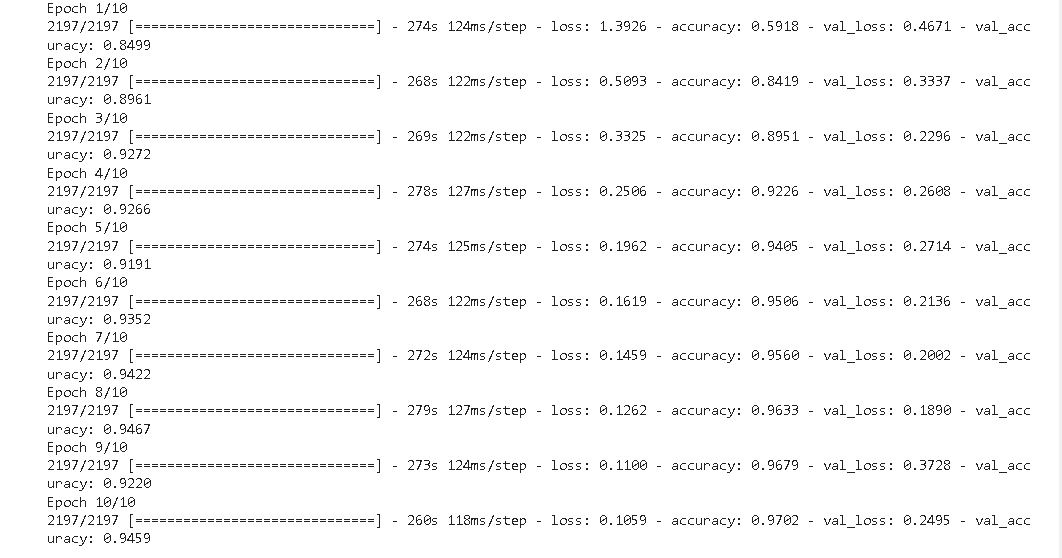

## Model Evaluation 

In [ ]:
#Training alone is not enough so we are using other parameters 

In [ ]:
#model evaluation on training set 

In [ ]:
#SAVING 

In [168]:
model.save('trained_plant_disease_model.keras')

In [169]:
#training_history.history

In [170]:
#Recording History in json
#import json
#with open('training_hist.json','w') as f:
#  json.dump(training_history.history,f)

In [171]:
#print(training_history.history.keys())


In [172]:
#epochs = [i for i in range(1,11)]
#plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
#plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
#plt.xlabel('No. of Epochs')
#plt.title('Visualization of Accuracy Result')
#plt.legend()
#plt.show()


In [173]:
class_name = validation_set.class_names


In [174]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [176]:
y_pred = model.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1) #for each file it is giving probability of each image 

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 1204s 68ms/step


In [177]:
true_categories = tf.concat([y for x, y in test_set], axis=0)  
Y_true = tf.argmax(true_categories, axis=1)  #maximum probability out of all 38 categories 

In [178]:

Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [179]:
predicted_categories


<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [ ]:
class_name = validation_set.class_names
class_name 

In [ ]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

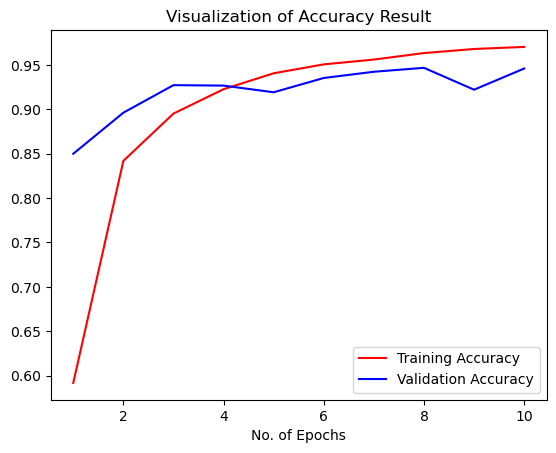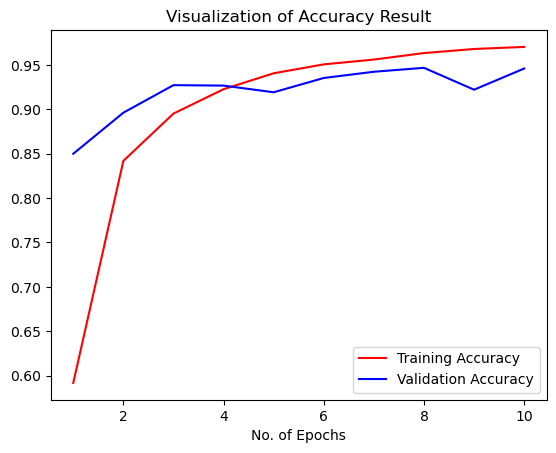

In [ ]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)


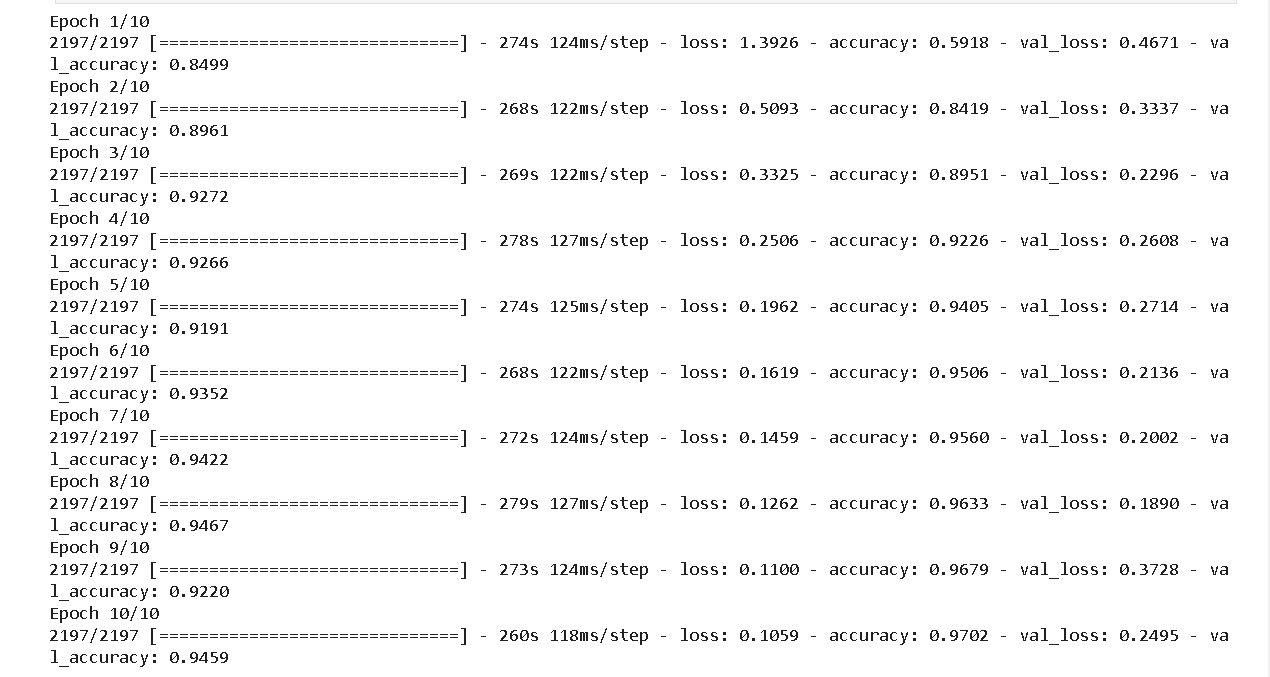

In [ ]:
training_history.history #Return Dictionary of history


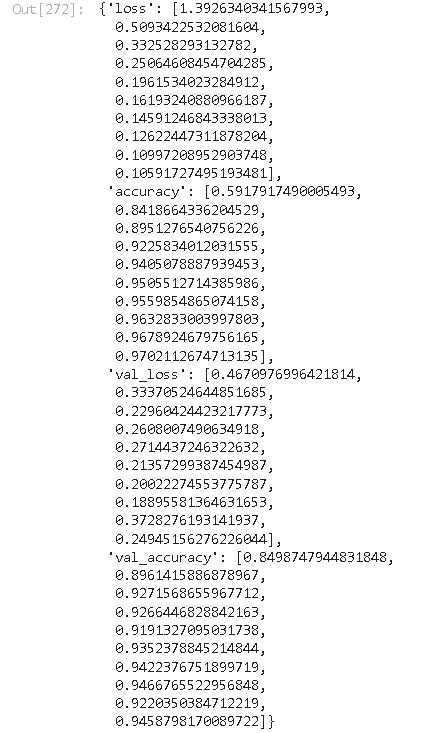

In [184]:
from sklearn.metrics import confusion_matrix,classification_report  #for precision recall
cm = confusion_matrix(Y_true,predicted_categories)

In [185]:
print(classification_report(Y_true,predicted_categories,target_names=class_name)) 


                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.92      0.95      0.93       504
                                 Apple___Black_rot       0.91      0.99      0.95       497
                          Apple___Cedar_apple_rust       0.98      0.94      0.96       440
                                   Apple___healthy       0.86      0.96      0.91       502
                               Blueberry___healthy       0.94      0.97      0.96       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.96      0.97       421
                 Cherry_(including_sour)___healthy       0.99      0.93      0.96       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.94      0.83      0.88       410
                       Corn_(maize)___Common_rust_       0.94      1.00      0.97       477
               Corn_(maize)___Northern_Leaf_Blight       0.91      0.96      0.

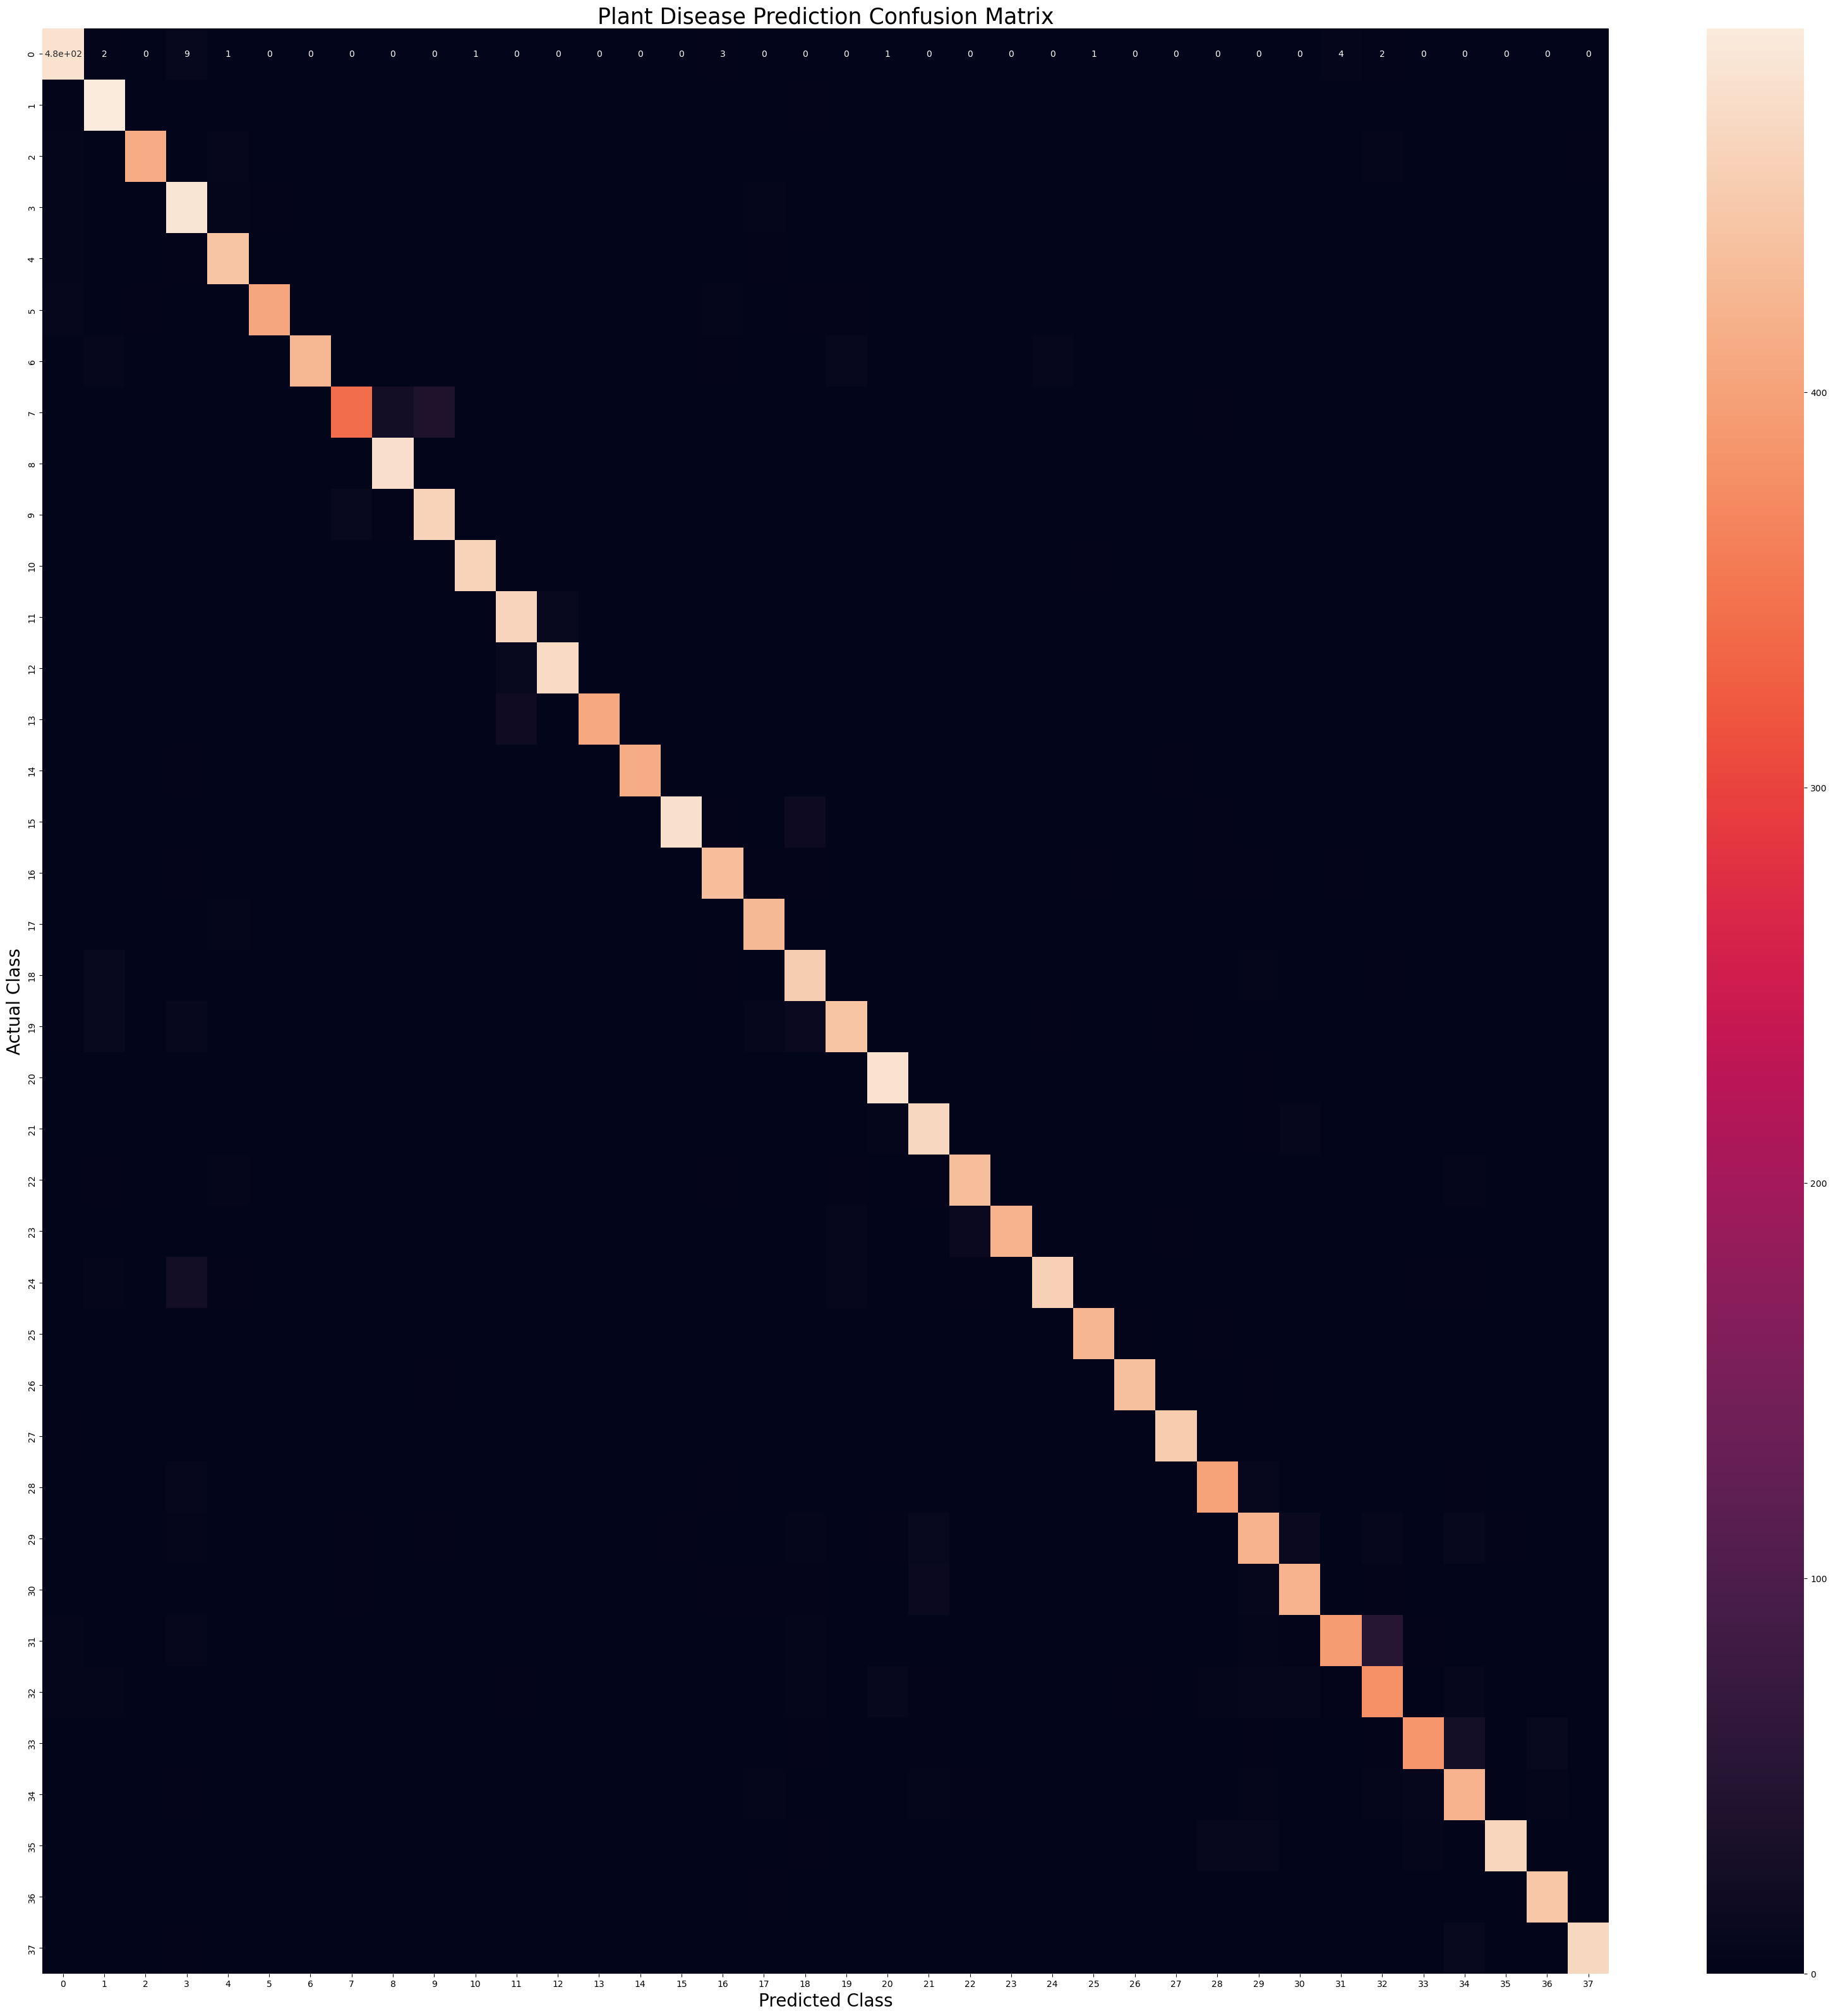

In [186]:
#confusion matrix
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()